You can compare the similarity of two distributions (here two normal distributions, group_blue and group_red) utilizing an adjusted area under the curve (AUC*) measure ranging from -0.5 to 0.5, as introduced in [Breimann24c]_. Provide only feature matrix ``X`` and its respective group ``labels`` to the ``comp_auc_adjusted`` function:

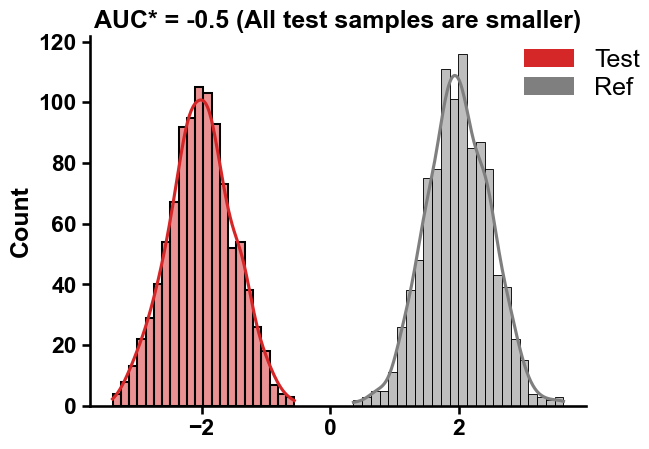

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import aaanalysis as aa
# Generate random data for two groups
group_test = np.random.normal(-2, 0.5, 1000)  # Mean = -2, Std = 0.5, 1000 samples
group_ref = np.random.normal(2, 0.5, 1000)  # Mean = 2, Std = 0.5, 1000 samples

# Combine data into a single dataset and reshape it
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X=X, labels=labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"AUC* = {auc_score} (All test samples are smaller)")
aa.plot_legend(dict_color=dict(Test="tab:red", Ref="tab:gray"), ncol=1, x=0.85, y=1)
sns.despine()
plt.show()

The greater the overlap between both distributions, the closer the ``auc_score`` is to 0:

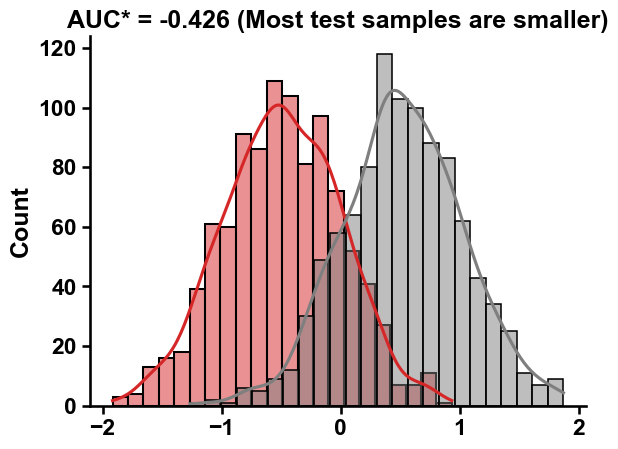

In [26]:
group_test = np.random.normal(-0.5, 0.5, 1000)
group_ref = np.random.normal(0.5, 0.5, 1000)
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"AUC* = {auc_score} (Most test samples are smaller)")
sns.despine()
plt.show()

A ``auc_score`` of 0 indicates a perfect overlap:

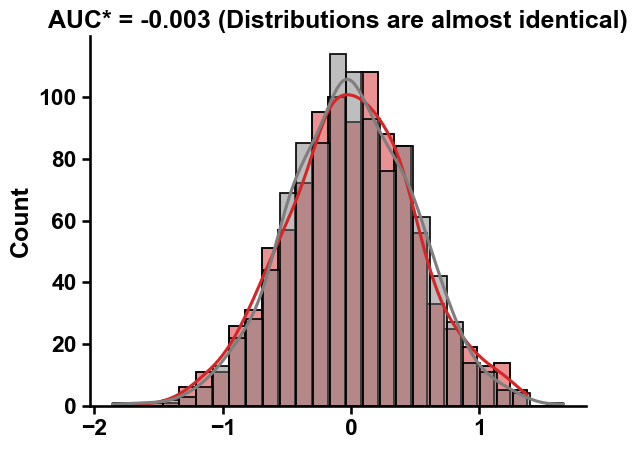

In [27]:
group_test = np.random.normal(0, 0.5, 1000) 
group_ref = np.random.normal(0, 0.5, 1000) 
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"AUC* = {auc_score} (Distributions are almost identical)")
sns.despine()
plt.show()

If all values from the test group (the higher integer value) are greater than the values of the reference group, the ``auc_score`` is 0.5: 

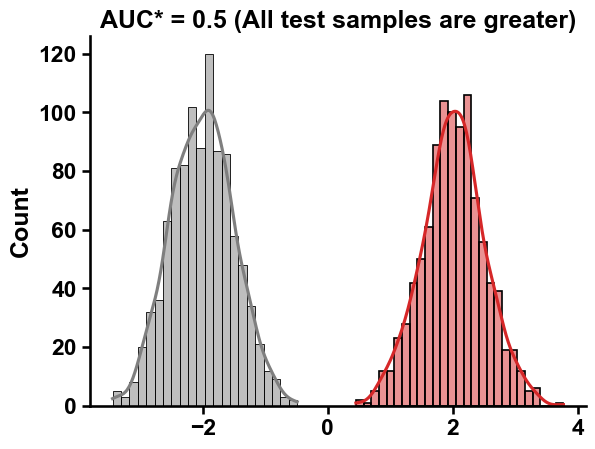

In [28]:
group_test = np.random.normal(2, 0.5, 1000) 
group_ref = np.random.normal(-2, 0.5, 1000) 
X = np.hstack([group_test, group_ref]).reshape(-1, 1)  # Reshape to 2D array
labels = np.array([1]*1000 + [0]*1000)
auc_score = aa.comp_auc_adjusted(X, labels)[0]

# Plot
aa.plot_settings()
sns.histplot(group_test, color="tab:red", kde=True, label='Test group', alpha=0.5)
sns.histplot(group_ref, color="tab:gray", kde=True, label='Reference group', alpha=0.5)
plt.title(f"AUC* = {auc_score} (All test samples are greater)")
sns.despine()
plt.show()